<a href="https://colab.research.google.com/github/karineha1/MiniProject-1-GR83/blob/main/COMP_551_A1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install GitPython
!pip install ucimlrepo
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install numpy





  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [28]:
from git import Repo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy as sc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings



In [44]:
df = pd.read_csv("/content/day.csv")
np.random.seed(0)

In [48]:
# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

df = X.copy()

for col in y.columns:
  df[col] = y[col]

print (df.head())

print (df.isna().sum())
#There are no missing values


# Create dataframe
df = bike_sharing.data.features.copy()
df['cnt'] = bike_sharing.data.targets  # Add target variable


#Date is alredy decomposed in the other components
df = df.drop('dteday', axis = 1).copy()




       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


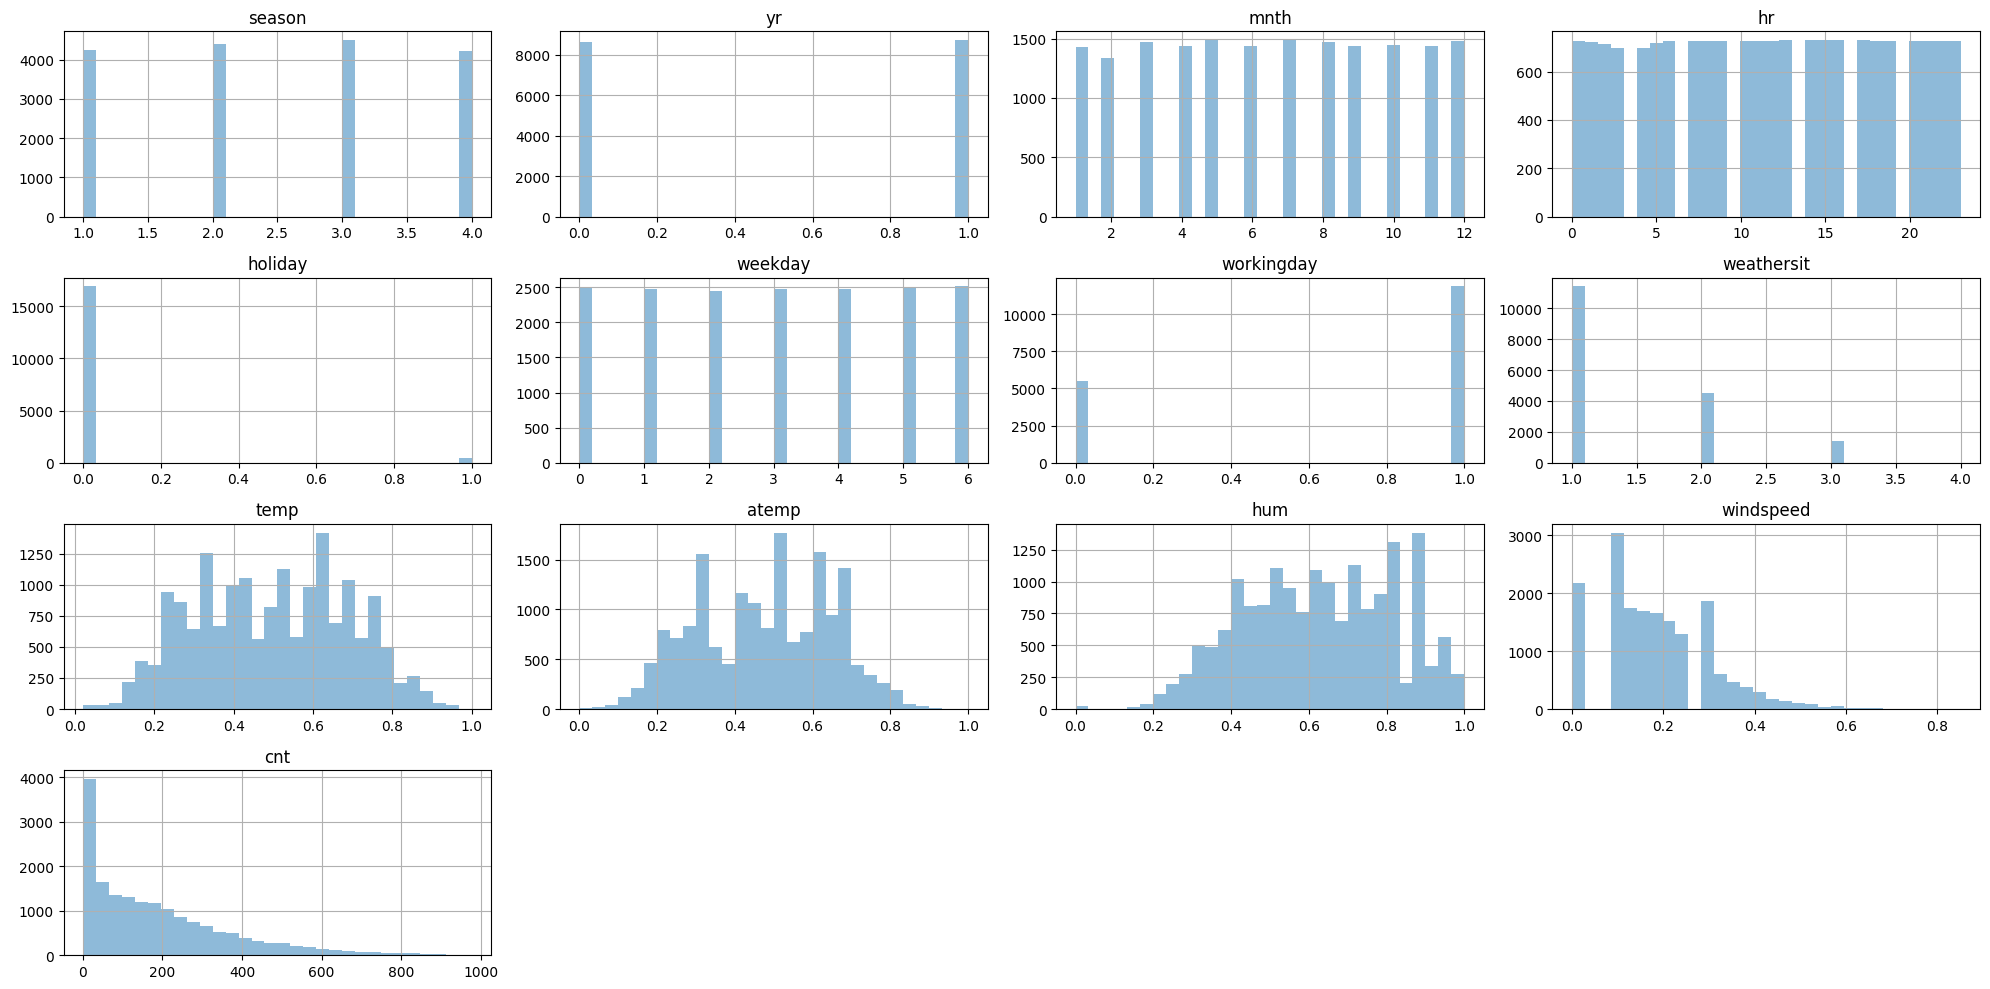

In [49]:
df.hist(alpha=0.5, figsize=(20, 10), bins = 30)
plt.tight_layout()
plt.show()

In [50]:
# Model
class LinearRegression:
  def __init__(self, add_bias = True):
    """
    Initializes Linear Regression Model.
    Parameters:
    add_bias: if True, adds an intercept term (bias/w_0) to the model
    """
    self.add_bias = add_bias
    self.w = None

  def fit (self, x, y):
    """
    Fit the linear regression model by computing optimal weights.
    Parameters:
    x: input features, shape (N,) or (N, D) where N = samples, D = features
    y: target values, shape (N,)
    """

    x = np.asarray(x, dtype = np.float32)
    y = np.asarray(y, dtype = np.float32)


    if x.ndim == 1:
      x = x[:, None]

    N = x.shape[0]

    if self.add_bias:
      x = np.column_stack([x, np.ones(N)])

    #Solve the least squares value

    self.w = np.linalg.lstsq(x, y, rcond=None)[0]

    return self


  def predict (self, x):
    """
    Predict target values for input x using learned weights.

    Parameters:
    x: input features, shape(N,) or (N, D) where N is the number of samples and
    D is the number of features

    Returns:
    y_pred: predicted target values, shape (N,)
    """
    if self.add_bias:
      x = np.column_stack([x, np.ones(x.shape[0])])

    # Matrix multiplication: x@w computes predictions
    # If x is (N, D+1) and w is (D+1,), the result is (N,)
    yh = x@self.w

    return yh

  def score (self, y, yh):
    """
    Calculate mean squared error for the given data
    """
    mse = np.mean((y - yh)**2)
    return mse


In [51]:
# 2.2 Train/Test Split

df['traintest'] = np.random.rand(len(df))
train = df[df['traintest'] > 0.5].copy()
test = df[df['traintest'] <= 0.5].copy()


In [52]:
#2.3 Evaluation
train_x = train.drop('cnt', axis = 1)
train_y = train['cnt']

test_x = test.drop('cnt', axis = 1)
test_y = test['cnt']

model = LinearRegression(add_bias = True)
model.fit(train_x, train_y)
train_yh = model.predict(train_x)
test_yh = model.predict(test_x)

train_mse = model.score(train_y, train_yh)
test_mse = model.score(test_y, test_yh)

norm_train_mse = train_mse/train_x.shape[0]
norm_test_mse = test_mse/test_x.shape[0]

print("Train MSE: ", norm_train_mse)
print("Test MSE: ", norm_test_mse)

Train MSE:  2.2869359768900988
Test MSE:  2.3469816771420824
